In [264]:
import pandas as pd
import numpy as np
import sklearn

feature_path = "YouTube-Personality-audiovisual_features.csv"

data = pd.read_csv(feature_path, encoding = 'UTF-8',sep = ' ')

col_to_drop = ['vlogId', 'hogv.entropy', 'hogv.median', 'hogv.cogR', 'hogv.cogC']
audio_features = data.drop(columns = col_to_drop)
#audio_features = data.drop(columns = ['vlogId'])
features_names = list(audio_features)
print(features_names)
label_path = "YouTube-Personality-Personality_impression_scores.csv"

labels = pd.read_csv(label_path, encoding = 'UTF-8',sep = ' ')
print(list(labels))
Extr_labels = labels['Extr']
Agr_labels = labels['Agr']
Cons_labels = labels['Cons']
Emot_labels = labels['Emot']
Open_labels = labels['Open']

for n in features_names:
    print(n)

['mean.pitch', 'sd.pitch', 'mean.conf.pitch', 'sd.conf.pitch', 'mean.spec.entropy', 'sd.spec.entropy', 'mean.val.apeak', 'sd.val.apeak', 'mean.loc.apeak', 'sd.loc.apeak', 'mean.num.apeak', 'sd.num.apeak', 'mean.energy', 'sd.energy', 'mean.d.energy', 'sd.d.energy', 'avg.voiced.seg', 'avg.len.seg', 'time.speaking', 'voice.rate', 'num.turns']
['vlogId', 'Extr', 'Agr', 'Cons', 'Emot', 'Open']
mean.pitch
sd.pitch
mean.conf.pitch
sd.conf.pitch
mean.spec.entropy
sd.spec.entropy
mean.val.apeak
sd.val.apeak
mean.loc.apeak
sd.loc.apeak
mean.num.apeak
sd.num.apeak
mean.energy
sd.energy
mean.d.energy
sd.d.energy
avg.voiced.seg
avg.len.seg
time.speaking
voice.rate
num.turns


In [265]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def make_model(X, Y, model, test_size):
    n = Y.shape[0]
    Y_mean = np.mean(Y)
    Y_classes = np.zeros(n)
    for i in range(n): # if the score is above the mean, it's high, otherwise low
        if Y[i] > Y_mean:
            Y_classes[i] = 1
    #Turn values into classification(high or low personality trait)
    model.fit(X,Y_classes)
    return np.max(cross_val_score(model,X,Y_classes,cv = 5))

X = audio_features.values
kernel_type = 'linear'
#Extroversion
Y = Extr_labels.values
Extr_model = SVC(C = 1, kernel = kernel_type, random_state = 4)
print("Extroversion",make_model(X, Y, Extr_model, 0.2))

Y = Agr_labels.values
Agr_model = SVC(kernel = kernel_type, random_state = 4)
print("Agreeableness", make_model(X, Y, Agr_model, 0.2))

Y = Cons_labels.values
Cons_model = SVC(kernel = kernel_type, random_state = 4)
print("Conscientiousness", make_model(X, Y, Cons_model, 0.2))

Y = Emot_labels.values
Emot_model = SVC(kernel = kernel_type, random_state = 4)
print("Neroticism", make_model(X, Y, Emot_model, 0.2))

Y = Open_labels.values
Open_model = SVC(kernel = kernel_type, random_state = 4)
print("Openness", make_model(X, Y, Open_model, 0.2))

Extroversion 0.6625
Agreeableness 0.5802469135802469
Conscientiousness 0.625
Neroticism 0.5679012345679012
Openness 0.6296296296296297


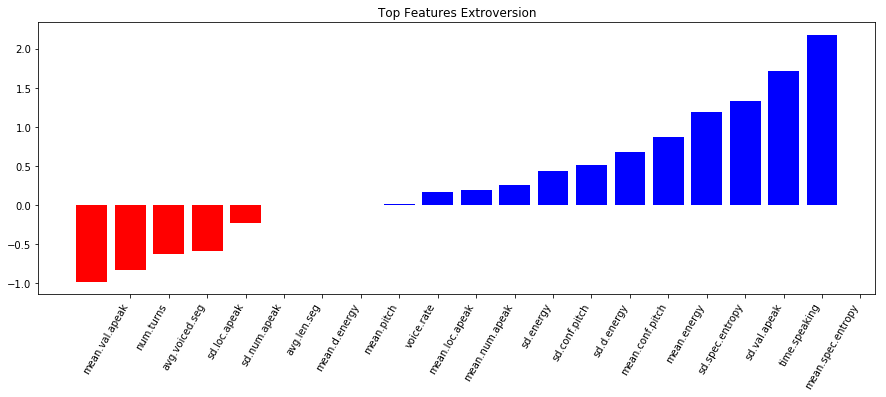

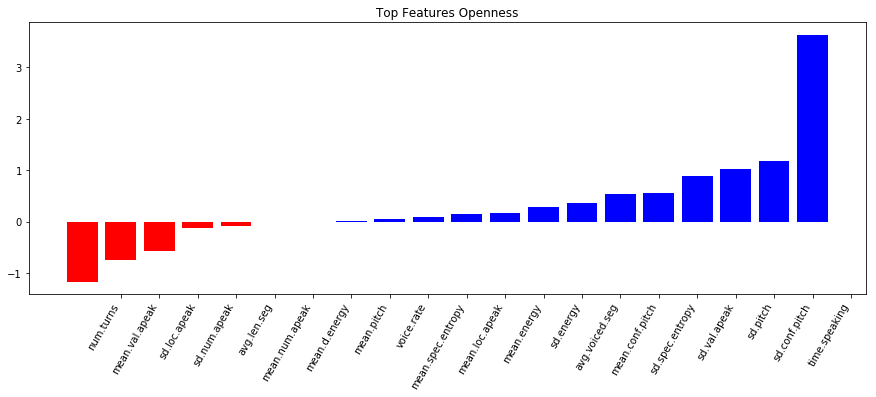

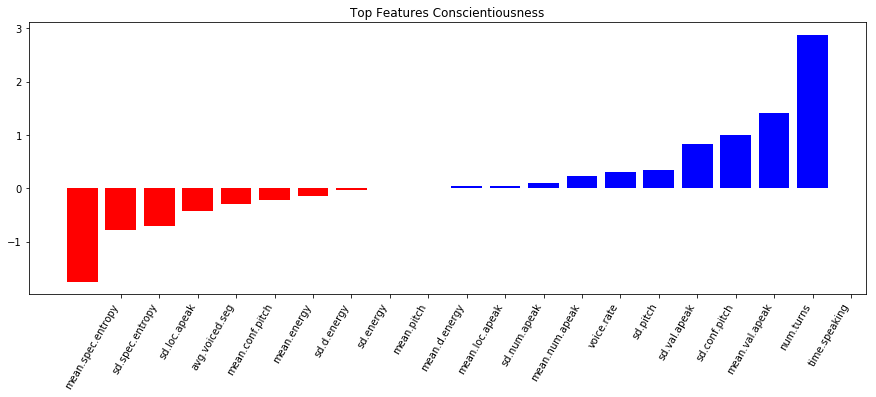

In [187]:
import matplotlib.pyplot as plt

def plot_coefficients(model, feature_names, top_features, title):
    coef = model.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
    plt.title(title)
    plt.show()
    
plot_coefficients(Extr_model,features_names,10,title = "Top Features Extroversion")    
plot_coefficients(Open_model,features_names,10,title = "Top Features Openness")
plot_coefficients(Cons_model,features_names,10,title = "Top Features Conscientiousness")


In [253]:
def make_classes(Y):
    n = Y.shape[0]
    Y_mean = np.mean(Y)
    #Y_classes = np.zeros(n)
    Y_classes = []
    for i in range(n): # if the score is above the mean, it's high, otherwise low
        if Y[i] > Y_mean:
            Y_classes.append('High')
        else:
            Y_classes.append('Low')
    return Y_classes
Extr_classes = make_classes(Extr_labels.values)
Open_classes = make_classes(Open_labels.values)
Cons_classes = make_classes(Cons_labels.values)

vlogIds = data["vlogId"].values
print(np.where(vlogIds == 'VLOG5')[0])

[2]


In [258]:
import os
files = os.listdir('./transcripts')

path = './transcripts/'
outfile = 'transcripts_lines.csv'
with open(outfile,'w') as outfile:
    outfile.write('"id","text","Extr","Open","Cons"\n')
    
    for f in files:
        vlogid = f[:-4]
        index = int(np.where(vlogIds == vlogid)[0])
        E_score = Extr_classes[index]
        O_score = Open_classes[index]
        C_score = Cons_classes[index]

        scores = '"%s","%s","%s"' % (E_score,O_score,C_score)
        
        file_line = ''
        f_path = path + f
        with open(f_path,'r') as file:
            for line in file:
                file_line += line[:-2].replace('"','')
        outfile.write('"' + f[:-4] + '"')
        outfile.write(',')
        outfile.write('"' + file_line + '",' + scores + "\n")

In [256]:
print(Open_classes[0])

High
